# Aula 12 – Análise Exploratória & Apresentação de insights
> Tera - dsc_jul2018

## Objetivo
> Avaliar quantitativamente a possibilidade de chuva no próximo festival de inverno de Campos do Jordão para apoiar o plano da campanha do Spotify.

### Contexto
> A área de marketing da sua empresa está planejando uma ação para o próximo festival de inverno de Campos do Jordão e precisa ponderar risco e retorno de fazer a ação ao ar livre ou em ambiente fechado. Budget e operação dependem dessa decisão que devemos embasar de forma quantitativa.

| ![spotify](img/spotify_logo.png "Spotify")      | ![campos](img/festivalCamposJordao_logo.jpg "CamposJordao") |
| ------------- |:-------------:|
| &nbsp; |&nbsp;|

## Conclusao
> TBD

### Updated at
> 10/ago/2018 by Tera-DSC Team

### Dataset
> Dados históricos da estação meteorológica convencional de Campos do Jordão do INMET (OMM: 83714). Contendo precipitação e outras variáveis.

### Warning
> A análise se baseia apenas em dados de 1 estação situada em Campos do Jordão.

> Não estão sendo consideradas previsões de chuva por modelos climáticos. Nem outro dataset que não a estação meteorológica de Campos do Jordão.

---
## Dados

### Dataset description
#### Fonte
> INMET - Instituto Nacional de Meteorologia

> BDMEP Dados históricos: http://www.inmet.gov.br/

#### Descricao
> Fonte: http://www.inmet.gov.br/portal/index.php?r=bdmep/bdmep

> O BDMEP é um banco de dados para apoiar as atividades de ensino e pesquisa e outras aplicações em meteorologia, hidrologia, recursos hídricos, saúde pública, meio ambiente.

> O Banco abriga dados meteorológicos diários em forma digital, de séries históricas das várias estações meteorológicas convencionais da rede de estações do INMET, referentes às medições diárias, de acordo com as normas técnicas internacionais da Organização Meteorológica Mundial.

> No BDMEP estão acessíveis os dados diários a partir de 1961 das estações para as quais se disponha, em forma digital, de pelo menos 80% dos dados que foram registrados naquele período. Os dados históricos referentes a períodos anteriores a 1961 ainda não estão em forma digital e, portanto, estão indisponíveis no BDMEP.

> As variáveis atmosféricas disponibilizadas para consultas no BDMEP são: precipitação ocorrida nas últimas 24 horas; temperatura do bulbo seco; temperatura do bulbo úmido; temperatura máxima; temperatura mínima; umidade relativa do ar; pressão atmosférica ao nível da estação; insolação; direção e velocidade do vento.

#### Janela de analise
> 01/01/1961 a 01/08/2017, em granularidade diária.

#### Data de obtencao
> 25/out/2017 6h26

#### Observacoes
> Dados obtidos manulamente através do website do INMET BDMEP.

In [1]:
#-- Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#-- Importando csv
dfEstCampos = pd.read_csv("../data/estacaoINMET_camposdojordao_83714.csv", sep=';', skiprows=16)
dfEstCampos.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
0,83714,01/01/1961,0,NaN,20.2,NaN,0.0,NaN,17.12,94.75,3.000000,NaN
1,83714,01/01/1961,1200,NaN,NaN,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,83714,02/01/1961,0,NaN,20.3,NaN,0.0,0.2,16.74,99.50,3.666667,NaN
3,83714,02/01/1961,1200,16.3,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,83714,03/01/1961,0,NaN,23.8,NaN,0.0,0.2,18.96,92.25,2.333333,NaN


## Verificacao e Correcao dos dados

In [10]:
# Verificando em overview
# dfEstCampos.head()
dfEstCampos[dfEstCampos["Hora"]==0].head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
0,83714,01/01/1961,0,NaN,20.2,NaN,0.0,NaN,17.12,94.75,3.000000,NaN
2,83714,02/01/1961,0,NaN,20.3,NaN,0.0,0.2,16.74,99.50,3.666667,NaN
4,83714,03/01/1961,0,NaN,23.8,NaN,0.0,0.2,18.96,92.25,2.333333,NaN
6,83714,04/01/1961,0,NaN,23.5,NaN,0.0,1.6,17.24,93.50,2.333333,NaN
8,83714,05/01/1961,0,NaN,21.2,NaN,0.0,1.0,16.78,94.25,2.333333,NaN


![specsVars](img/specsVariables_estacaoINMET.png "Variables specification")

In [6]:
#------------------------------------------------------------------------------------------------------------
#--Observamos uma coluna sobrando para uma variavel inexistente
dfEstCampos.columns[11]

'Unnamed: 11'

In [7]:
#--Corrige variavel inexistente
dfEstCamposCorrigido = dfEstCampos.drop('Unnamed: 11', axis=1)
dfEstCamposCorrigido.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,83714,01/01/1961,0,NaN,20.2,NaN,0.0,NaN,17.12,94.75,3.000000
1,83714,01/01/1961,1200,NaN,NaN,14.8,NaN,NaN,NaN,NaN,NaN
2,83714,02/01/1961,0,NaN,20.3,NaN,0.0,0.2,16.74,99.50,3.666667
3,83714,02/01/1961,1200,16.3,NaN,15.0,NaN,NaN,NaN,NaN,NaN
4,83714,03/01/1961,0,NaN,23.8,NaN,0.0,0.2,18.96,92.25,2.333333


In [7]:
#------------------------------------------------------------------------------------------------------------
#--Observamos que as variaveis TempMinima e Precipitacao se apresentam em outra linha com horario = 12h00

In [9]:
#--Corrigindo TempMinima e Precipitacao
#Splita rows por hora em 2 dataframes
dfTemp12 = dfEstCamposCorrigido[dfEstCamposCorrigido.Hora == 1200]
dfTemp00 = dfEstCamposCorrigido[dfEstCamposCorrigido.Hora == 0]

#Imprime dimensoes de ambos subsets e do dataset completo
print("dfTemp00.shape: "+str(dfTemp00.shape)+
      "\ndfTemp12.shape: "+str(dfTemp12.shape)+
      "\ndfEstCamposCorrigido.shape: "+str(dfEstCamposCorrigido.shape)
     )

dfTemp00.shape: (18658, 11)
dfTemp12.shape: (18974, 11)
dfEstCamposCorrigido.shape: (37632, 11)


In [11]:
#Define chaves para join
dfTemp00['chave'] = dfTemp00["Estacao"].map(str) + dfTemp00["Data"].map(str)
dfTemp12['chave'] = dfTemp12["Estacao"].map(str) + dfTemp12["Data"].map(str)

#Evidencia variaveis TemMinima e Precipitacao deletando demais colunas
dfTemp12.drop(dfTemp12.columns[[0,1,2,4,6,7,8,9,10]], axis=1, inplace=True)
dfTemp12.head()

/Users/acsilveira/anaconda2/envs/tera-fev2018/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/acsilveira/anaconda2/envs/tera-fev2018/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/acsilveira/anaconda2/envs/tera-fev2018/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Precipitacao,TempMinima,chave
1,NaN,14.8,8371401/01/1961
3,16.3,15.0,8371402/01/1961
5,27.9,14.8,8371403/01/1961
7,0.0,13.2,8371404/01/1961
9,27.8,12.4,8371405/01/1961


In [13]:
#Faz o join
dfEstCamposJoined = dfTemp00.set_index('chave').join(dfTemp12.set_index('chave'), lsuffix='_00', rsuffix='_12')
# dfEstCamposJoined["TempMinima_00"].mean()
dfEstCamposJoined["TempMinima_12"].mean()

nan

In [14]:
dfEstCamposJoined.head()

,Estacao,Data,Hora,Precipitacao_00,TempMaxima,TempMinima_00,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao_12,TempMinima_12
chave,,,,,,,,,,,,,
8371401/01/1961,83714,01/01/1961,0,NaN,20.2,NaN,0.0,NaN,17.12,94.75,3.000000,NaN,14.8
8371402/01/1961,83714,02/01/1961,0,NaN,20.3,NaN,0.0,0.2,16.74,99.50,3.666667,16.3,15.0
8371403/01/1961,83714,03/01/1961,0,NaN,23.8,NaN,0.0,0.2,18.96,92.25,2.333333,27.9,14.8
8371404/01/1961,83714,04/01/1961,0,NaN,23.5,NaN,0.0,1.6,17.24,93.50,2.333333,0.0,13.2
8371405/01/1961,83714,05/01/1961,0,NaN,21.2,NaN,0.0,1.0,16.78,94.25,2.333333,27.8,12.4


In [16]:
#Cria novas variaveis TempMinima e Precipitacao
dfEstCamposJoined["TempMinima"] = dfEstCamposJoined["TempMinima_12"]
dfEstCamposJoined["Precipitacao"] = dfEstCamposJoined["Precipitacao_12"]

#Remove colunas temporarias para o join
dfEstCamposJoined.drop('TempMinima_00', axis=1, inplace=True)
dfEstCamposJoined.drop('TempMinima_12', axis=1, inplace=True)
dfEstCamposJoined.drop('Precipitacao_00', axis=1, inplace=True)
dfEstCamposJoined.drop('Precipitacao_12', axis=1, inplace=True)

#Reseta o index
dfEstCamposJoined = dfEstCamposJoined.reset_index(drop=True)

#Renomeia dataframe corrigido
dfEstCamposCorrigido = dfEstCamposJoined
dfEstCamposCorrigido.head()
# dfEstCamposCorrigido.tail()

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao
18653,83714,27/07/2017,0,21.2,NaN,1.9,NaN,NaN,NaN,4.9,0.0
18654,83714,28/07/2017,0,21.6,NaN,2.4,NaN,NaN,NaN,2.3,0.0
18655,83714,29/07/2017,0,20.8,NaN,3.9,NaN,NaN,NaN,5.3,0.0
18656,83714,30/07/2017,0,18.2,NaN,2.3,NaN,NaN,NaN,4.7,0.0
18657,83714,31/07/2017,0,17.6,NaN,2.0,NaN,NaN,NaN,3.3,0.0


In [18]:
#------------------------------------------------------------------------------------------------------------
#--Verifica colunas com NaN
# dfEstCamposCorrigido.isnull().any()
dfEstCamposCorrigido.isnull().sum()

Estacao                         0
Data                            0
Hora                            0
TempMaxima                    852
Insolacao                    6776
Evaporacao Piche              494
Temp Comp Media              7287
Umidade Relativa Media       6824
Velocidade do Vento Media    4445
TempMinima                   4202
Precipitacao                  121
dtype: int64

In [19]:
#--Corrige colunas com Nan, setando flag
#Avalia melhor valor para flag
dfEstCamposCorrigido.min()

Estacao                           83714
Data                         01/01/1961
Hora                                  0
TempMaxima                          7.8
Insolacao                             0
Evaporacao Piche                      0
Temp Comp Media                    2.84
Umidade Relativa Media            42.75
Velocidade do Vento Media             0
TempMinima                         -7.2
Precipitacao                          0
dtype: object

In [20]:
dfEstCamposCorrigido.fillna(value=-100, inplace=True)
dfEstCamposCorrigido.min()
# dfEstCamposCorrigido.head()

Estacao                           83714
Data                         01/01/1961
Hora                                  0
TempMaxima                         -100
Insolacao                          -100
Evaporacao Piche                   -100
Temp Comp Media                    -100
Umidade Relativa Media             -100
Velocidade do Vento Media          -100
TempMinima                         -100
Precipitacao                       -100
dtype: object

In [22]:
#------------------------------------------------------------------------------------------------------------
#--Verifica consistencia das datas
# Cria variavel data_verificacao
dfEstCamposCorrigido['DataVerificacao'] = pd.DataFrame(data=pd.date_range('1/1/1961', periods=(len(dfEstCamposCorrigido.index)-10), freq='D'))

# Converte data original em DateTime, variavel data_convertida
dfEstCamposCorrigido['DataConvertida'] = pd.to_datetime(dfEstCamposCorrigido['Data'], format='%d/%m/%Y')

dfEstCamposCorrigido.head()

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao,DataVerificacao,DataConvertida
0,83714,01/01/1961,0,20.2,0.0,-100.0,17.12,94.75,3.000000,14.8,-100.0,1961-01-01,1961-01-01
1,83714,02/01/1961,0,20.3,0.0,0.2,16.74,99.50,3.666667,15.0,16.3,1961-01-02,1961-01-02
2,83714,03/01/1961,0,23.8,0.0,0.2,18.96,92.25,2.333333,14.8,27.9,1961-01-03,1961-01-03
3,83714,04/01/1961,0,23.5,0.0,1.6,17.24,93.50,2.333333,13.2,0.0,1961-01-04,1961-01-04
4,83714,05/01/1961,0,21.2,0.0,1.0,16.78,94.25,2.333333,12.4,27.8,1961-01-05,1961-01-05


In [23]:
#Conta divergencias entre data_convertida e data_verificada
dfEstCamposCorrigido[dfEstCamposCorrigido.DataConvertida != dfEstCamposCorrigido.DataVerificacao].shape

(18445, 13)

In [25]:
dfEstCamposCorrigido[dfEstCamposCorrigido.DataConvertida != dfEstCamposCorrigido.DataVerificacao].head()
# dfEstCamposCorrigido[200:215]

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao,DataVerificacao,DataConvertida
200,83714,20/07/1961,0,20.8,9.4,2.5,8.62,86.75,0.000000,-2.0,0.0,1961-07-20,1961-07-20
201,83714,21/07/1961,0,19.0,9.6,2.0,7.78,87.00,2.333333,-2.0,0.0,1961-07-21,1961-07-21
202,83714,22/07/1961,0,21.5,9.6,3.0,10.16,87.00,1.333333,-1.0,0.0,1961-07-22,1961-07-22
203,83714,23/07/1961,0,20.0,9.1,2.7,10.56,85.25,1.333333,2.2,0.0,1961-07-23,1961-07-23
204,83714,24/07/1961,0,20.2,8.7,2.8,9.32,85.75,1.333333,0.0,0.0,1961-07-24,1961-07-24
205,83714,25/07/1961,0,21.0,9.9,2.7,9.24,85.00,0.666667,-1.0,0.0,1961-07-25,1961-07-25
206,83714,26/07/1961,0,20.0,8.7,2.6,11.24,85.00,1.333333,-0.2,0.0,1961-07-26,1961-07-26
207,83714,27/07/1961,0,18.6,6.0,2.4,12.86,88.50,3.666667,8.3,0.0,1961-07-27,1961-07-27
208,83714,28/07/1961,0,15.8,5.2,1.5,11.12,93.50,2.333333,5.4,0.0,1961-07-28,1961-07-28
209,83714,29/07/1961,0,14.2,2.4,1.1,10.94,94.50,3.000000,8.6,0.5,1961-07-29,1961-07-29


In [26]:
#--Corrige inconsistencias nas datas
#Apenas observaremos que ha periodos faltantes

#Removendo coluna auxiliar DataVerificacao
dfEstCamposCorrigido.drop('DataVerificacao', axis=1, inplace=True)
dfEstCamposCorrigido.drop('Hora', axis=1, inplace=True)
dfEstCamposCorrigido.head()

,Estacao,Data,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao,DataConvertida
0,83714,01/01/1961,20.2,0.0,-100.0,17.12,94.75,3.000000,14.8,-100.0,1961-01-01
1,83714,02/01/1961,20.3,0.0,0.2,16.74,99.50,3.666667,15.0,16.3,1961-01-02
2,83714,03/01/1961,23.8,0.0,0.2,18.96,92.25,2.333333,14.8,27.9,1961-01-03
3,83714,04/01/1961,23.5,0.0,1.6,17.24,93.50,2.333333,13.2,0.0,1961-01-04
4,83714,05/01/1961,21.2,0.0,1.0,16.78,94.25,2.333333,12.4,27.8,1961-01-05


## Interpretação de variáveis originais

In [27]:
#------------------------------------------------------------------------------------------------------------
#--Summaries e Plots
#Libs
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#--Plota TempMaxima
dfEstCamposCorrigido.TempMaxima.describe()
# dfEstCamposCorrigido.plot(x='DataConvertida', y='TempMaxima', kind='line', title='TempMaxima', figsize=(20,10), ylim=[-10, 40], fontsize=16)
# dfEstCamposCorrigido.plot(x='DataConvertida', y='TempMaxima', kind='line', title='TempMaxima', figsize=(20,10), xlim=[pd.Timestamp('2000-01-01'), pd.Timestamp('2001-12-31')], ylim=[-150, 40], fontsize=16)

count    18658.000000
mean        15.238557
std         25.419690
min       -100.000000
25%         18.100000
50%         20.800000
75%         23.000000
max         30.500000
Name: TempMaxima, dtype: float64

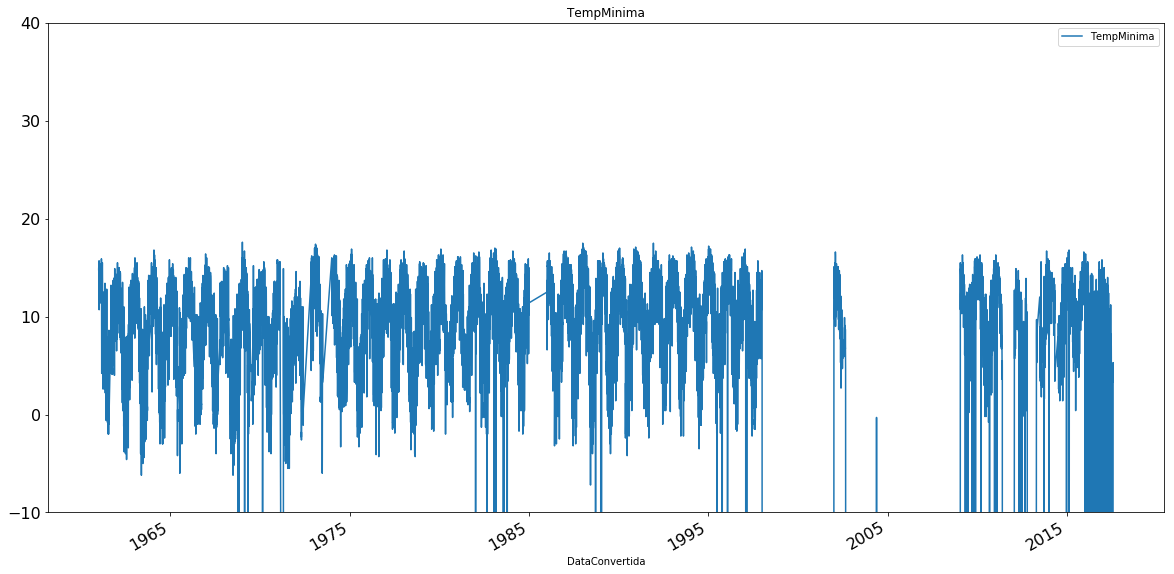

In [36]:
#--Plota TempMinima
dfEstCamposCorrigido.plot(x='DataConvertida', y='TempMinima', kind='line', title='TempMinima', figsize=(20,10), ylim=[-10, 40], fontsize=16)
# dfEstCamposCorrigido.plot(x='DataConvertida', y='TempMinima', kind='line', title='TempMinima', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], ylim=[-10, 40], fontsize=16)
# dfEstCamposCorrigido.plot(x='DataConvertida', y='TempMinima', kind='line', title='TempMinima', figsize=(20,10), xlim=[pd.Timestamp('1992-01-01'), pd.Timestamp('1994-12-31')], ylim=[-10, 40], fontsize=16)

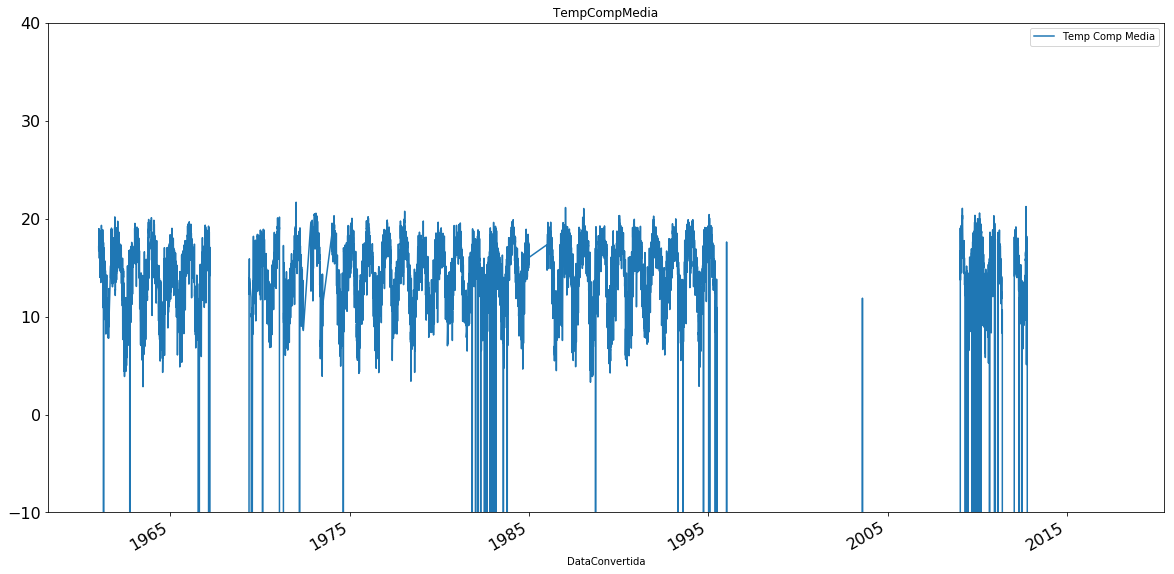

In [37]:
#--Plota TempCompMedia
dfEstCamposCorrigido.plot(x='DataConvertida', y='Temp Comp Media', kind='line', title='TempCompMedia', figsize=(20,10), ylim=[-10, 40], fontsize=16)
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Temp Comp Media', kind='line', title='TempCompMedia', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], ylim=[-10, 40], fontsize=16)
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Temp Comp Media', kind='line', title='TempCompMedia', figsize=(20,10), xlim=[pd.Timestamp('1991-01-01'), pd.Timestamp('1992-12-31')], ylim=[-10, 40], fontsize=16)

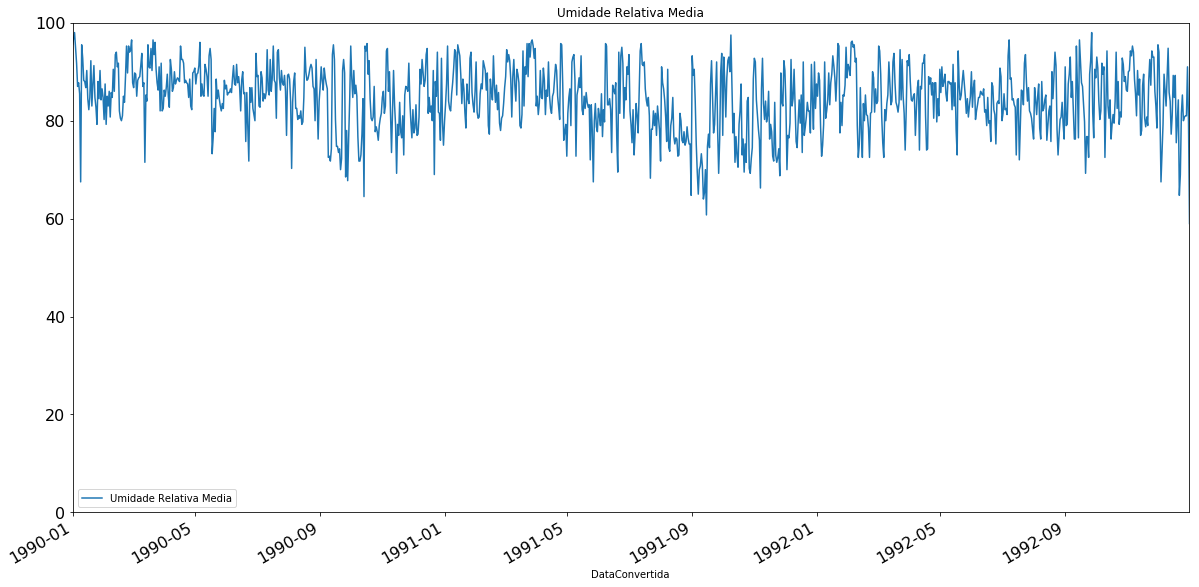

In [39]:
#--Plota Umidade Relativa Media
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Umidade Relativa Media', kind='line', title='Umidade Relativa Media', figsize=(20,10), fontsize=16, ylim=[0, 150])
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Umidade Relativa Media', kind='line', title='Umidade Relativa Media', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], ylim=[0, 100], fontsize=16)
dfEstCamposCorrigido.plot(x='DataConvertida', y='Umidade Relativa Media', kind='line', title='Umidade Relativa Media', figsize=(20,10), xlim=[pd.Timestamp('1990-01-01'), pd.Timestamp('1992-12-31')], ylim=[0, 100], fontsize=16)

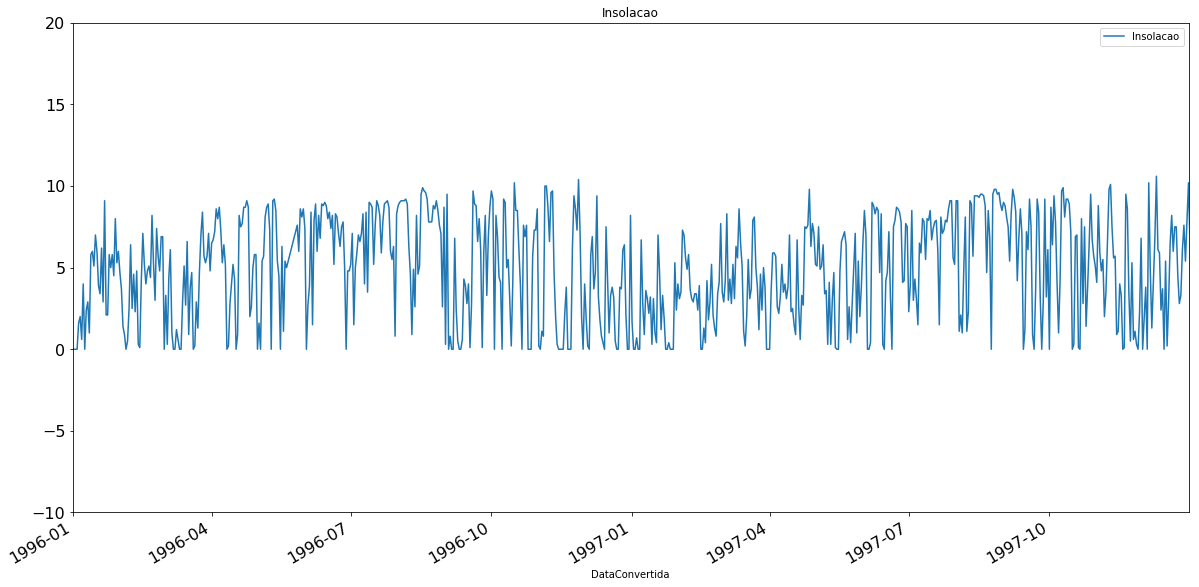

In [40]:
#--Plota Insolacao
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Insolacao', kind='line', title='Insolacao', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], fontsize=16)
dfEstCamposCorrigido.plot(x='DataConvertida', y='Insolacao', kind='line', title='Insolacao', figsize=(20,10), xlim=[pd.Timestamp('1996-01-01'), pd.Timestamp('1997-12-31')], ylim=[-10, 20], fontsize=16)


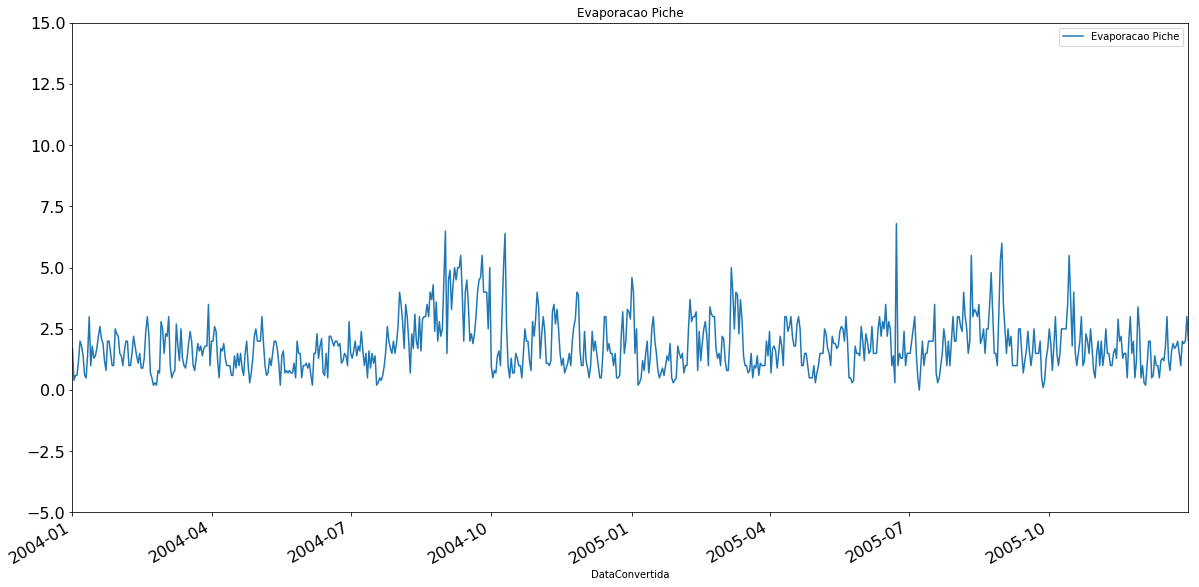

In [41]:
#--Plota Evaporacao Piche
dfEstCamposCorrigido.plot(x='DataConvertida', y='Evaporacao Piche', kind='line', title='Evaporacao Piche', figsize=(20,10), xlim=[pd.Timestamp('2004-01-01'), pd.Timestamp('2005-12-31')], ylim=[-5, 15], fontsize=16)


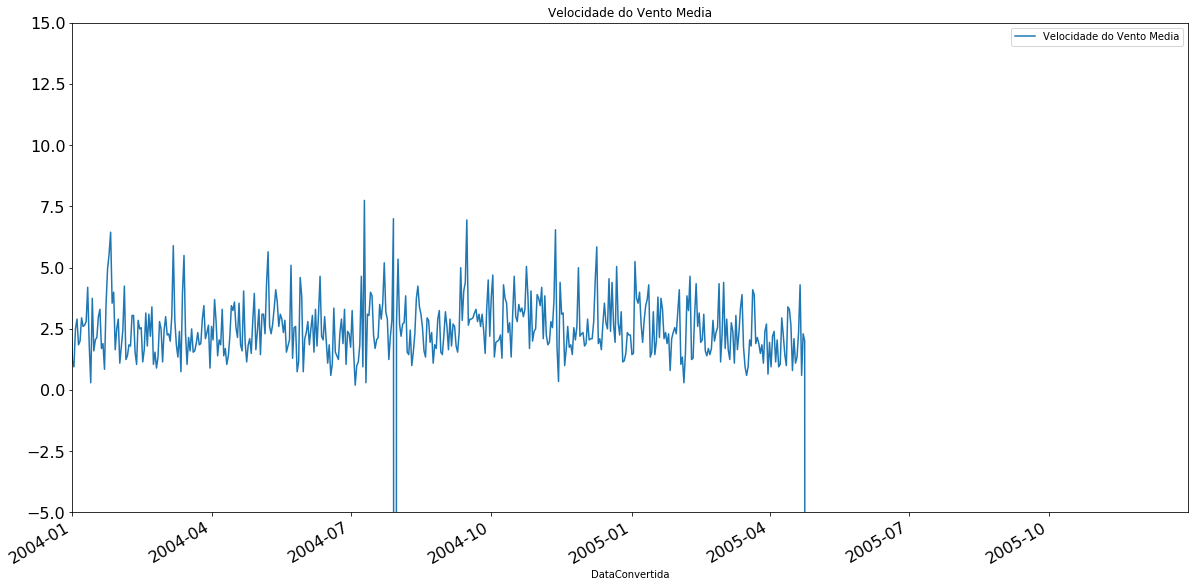

In [44]:
#--Plota Velocidade do Vento Media
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Velocidade do Vento Media', kind='line', title='Velocidade do Vento Media', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], ylim=[-5, 15], fontsize=16)
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Velocidade do Vento Media', kind='line', title='Velocidade do Vento Media', figsize=(20,10), xlim=[pd.Timestamp('2005-01-01'), pd.Timestamp('2005-03-31')], ylim=[-5, 15], fontsize=16)
dfEstCamposCorrigido.plot(x='DataConvertida', y='Velocidade do Vento Media', kind='line', title='Velocidade do Vento Media', figsize=(20,10), xlim=[pd.Timestamp('2004-01-01'), pd.Timestamp('2005-12-31')], ylim=[-5, 15], fontsize=16)


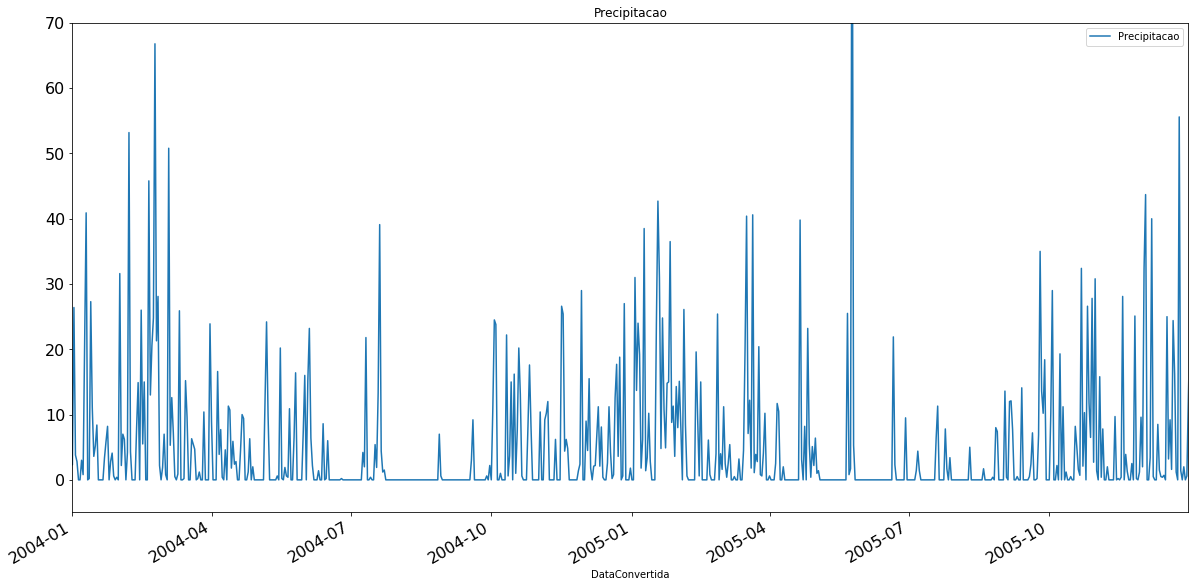

In [49]:
#--Plota Precipitacao
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Precipitacao', kind='line', title='Precipitacao', figsize=(20,10), ylim=[-5, 150], fontsize=16)
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Precipitacao', kind='line', title='Precipitacao', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], ylim=[-5, 70], fontsize=16)
# dfEstCamposCorrigido.plot(x='DataConvertida', y='Precipitacao', kind='line', marker='o', title='Precipitacao', figsize=(20,10), xlim=[pd.Timestamp('2016-01-01'), pd.Timestamp('2016-01-31')], ylim=[-5, 70], fontsize=16)
dfEstCamposCorrigido.plot(x='DataConvertida', y='Precipitacao', kind='line', title='Precipitacao', figsize=(20,10), xlim=[pd.Timestamp('2004-01-01'), pd.Timestamp('2005-12-31')], ylim=[-5, 70], fontsize=16)


In [51]:
#--Plota Temperaturas
dfPlot = dfEstCamposCorrigido.set_index('DataConvertida')
dfPlot.drop(dfPlot.columns[[0,1,3,4,6,7,9]], axis=1, inplace=True)
dfPlot.head()

,TempMaxima,Temp Comp Media,TempMinima
DataConvertida,,,
1961-01-01,20.2,17.12,14.8
1961-01-02,20.3,16.74,15.0
1961-01-03,23.8,18.96,14.8
1961-01-04,23.5,17.24,13.2
1961-01-05,21.2,16.78,12.4


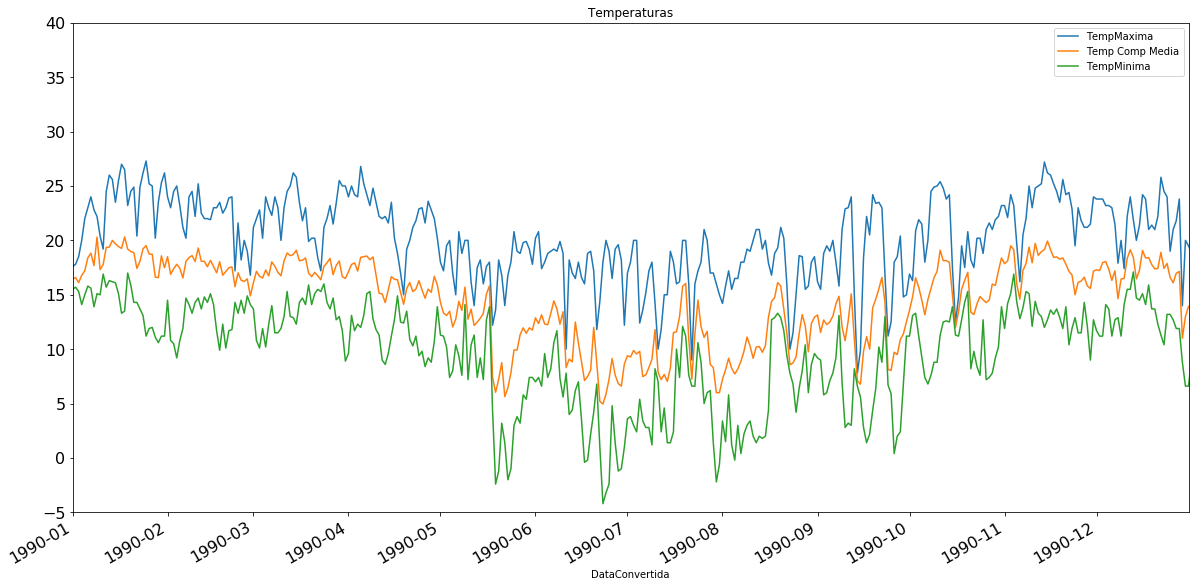

In [52]:
dfPlot.plot(title='Temperaturas', figsize=(20,10), xlim=[pd.Timestamp('1990-01-01'), pd.Timestamp('1990-12-31')], ylim=[-5, 40], fontsize=16)

## Criacao de variaveis secundarias

In [53]:
#------------------------------------------------------------------------------------------------------------
#--Criando variavel Amplitude Termica
dfPlot['AmplitudeTermica'] = dfPlot.TempMaxima.replace(-100,np.nan) - dfPlot.TempMinima.replace(-100,np.nan)
dfPlot.head()

,TempMaxima,Temp Comp Media,TempMinima,AmplitudeTermica
DataConvertida,,,,
1961-01-01,20.2,17.12,14.8,5.4
1961-01-02,20.3,16.74,15.0,5.3
1961-01-03,23.8,18.96,14.8,9.0
1961-01-04,23.5,17.24,13.2,10.3
1961-01-05,21.2,16.78,12.4,8.8


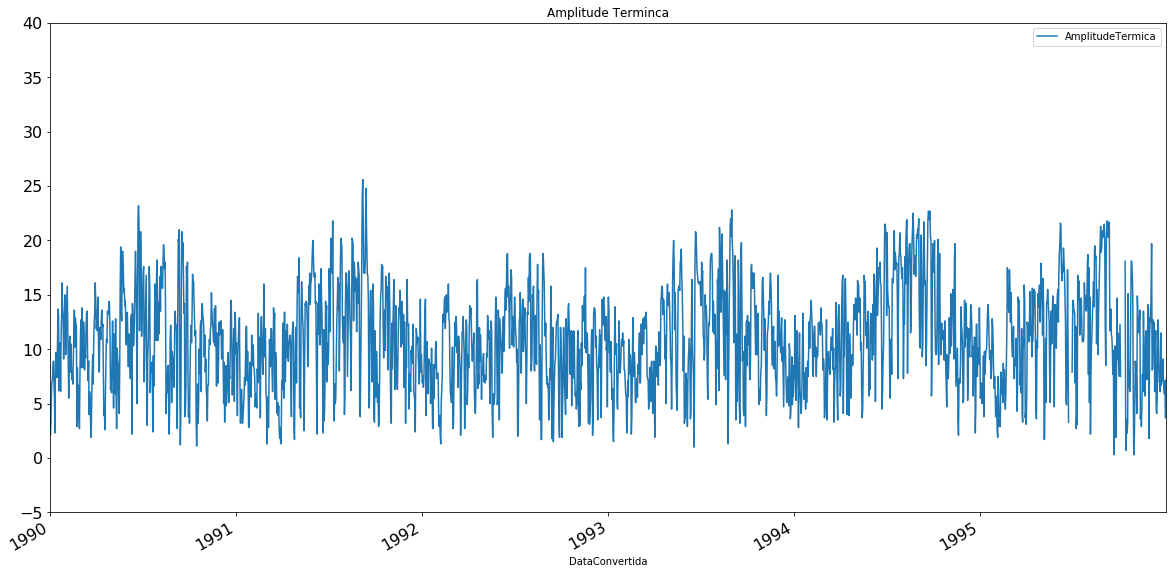

In [54]:
dfPlot.plot(y='AmplitudeTermica', title='Amplitude Terminca', kind='line', figsize=(20,10), xlim=[pd.Timestamp('1990-01-01'), pd.Timestamp('1995-12-31')], ylim=[-5, 40], fontsize=16)

## Organização do dataset

In [56]:
#------------------------------------------------------------------------------------------------------------
#--Mantendo apenas variaveis que iremos explorar: Precipitacao
dfEstCamposExploracao = dfEstCamposCorrigido.set_index('DataConvertida')
dfEstCamposExploracao['AmplitudeTermica'] = dfEstCamposExploracao.TempMaxima - dfEstCamposExploracao.TempMinima
dfEstCamposExploracao.drop(dfEstCamposExploracao.columns[[0,1,2,3,4,5,6,7,8]], axis=1, inplace=True)
dfEstCamposExploracao.head()

,Precipitacao,AmplitudeTermica
DataConvertida,,
1961-01-01,-100.0,5.4
1961-01-02,16.3,5.3
1961-01-03,27.9,9.0
1961-01-04,0.0,10.3
1961-01-05,27.8,8.8


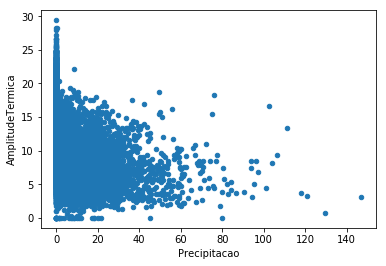

In [59]:
#Verificando correlacao entre precipitacao e amplitude termica
dfEstCamposExploracao[(dfEstCamposExploracao.Precipitacao>=0) & (dfEstCamposExploracao.AmplitudeTermica>=0) & (dfEstCamposExploracao.AmplitudeTermica<100)].plot(kind='scatter', x='Precipitacao', y='AmplitudeTermica')
# dfEstCamposExploracao[(dfEstCamposExploracao.Precipitacao>=0) & (dfEstCamposExploracao.AmplitudeTermica>=0) & (dfEstCamposExploracao.AmplitudeTermica<100)].corr(method='pearson')['Precipitacao']

## Exploracao

### Hipotese
A variação da chuva no inverno de Campos do Jordão é comportada o suficiente para planejar um número mínimo de atividades ao ar livre.

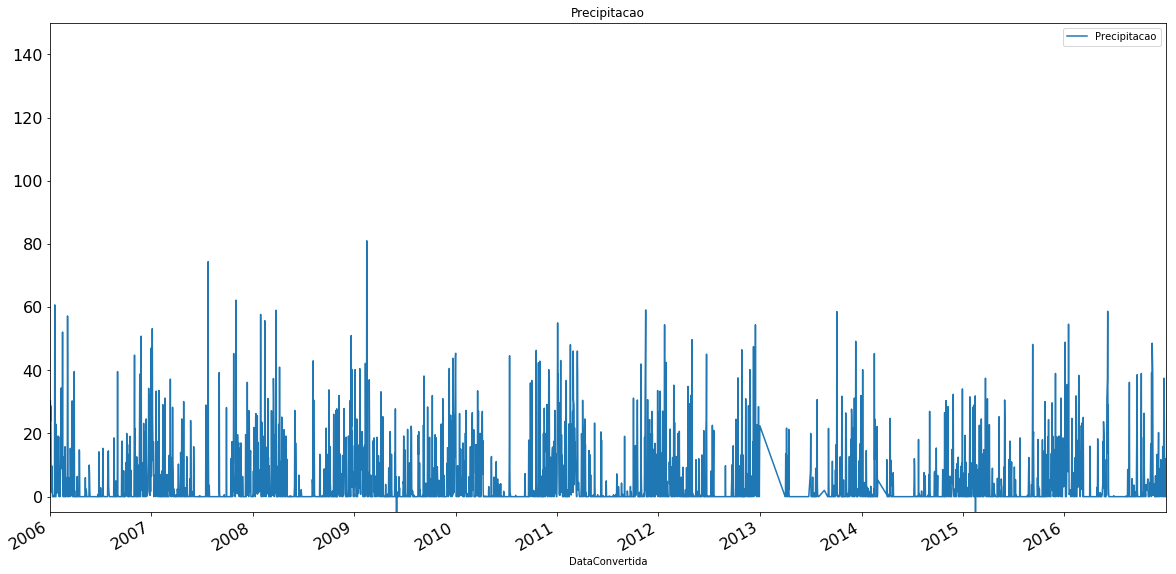

In [60]:
#Observando precitacao nos ultimos 10 anos
dfEstCamposExploracao.plot(y='Precipitacao', title='Precipitacao', kind='line', figsize=(20,10), xlim=[pd.Timestamp('2006-01-01'), pd.Timestamp('2016-12-31')], ylim=[-5, 150], fontsize=16)


In [ ]:
#--Observando mais de perto os ultimos 5 anos
#Meses de inverno = mai, jun, jul e ago
inverno2006 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2006-05-01'):pd.Timestamp('2006-09-01')]
inverno2006 = inverno2006.reset_index(drop=True)
inverno2007 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2007-05-01'):pd.Timestamp('2007-09-01')]
inverno2007 = inverno2007.reset_index(drop=True)
inverno2008 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2008-05-01'):pd.Timestamp('2008-09-01')]
inverno2008 = inverno2008.reset_index(drop=True)
inverno2009 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2009-05-01'):pd.Timestamp('2009-09-01')]
inverno2009 = inverno2009.reset_index(drop=True)
inverno2010 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2010-05-01'):pd.Timestamp('2010-09-01')]
inverno2010 = inverno2010.reset_index(drop=True)

dfInverno = pd.DataFrame({'inverno2006' : inverno2006, 'inverno2007' : inverno2007, 'inverno2008' : inverno2008, 'inverno2009' : inverno2009, 'inverno2010' : inverno2010})
dfInverno.replace(-100, np.nan, inplace=True)

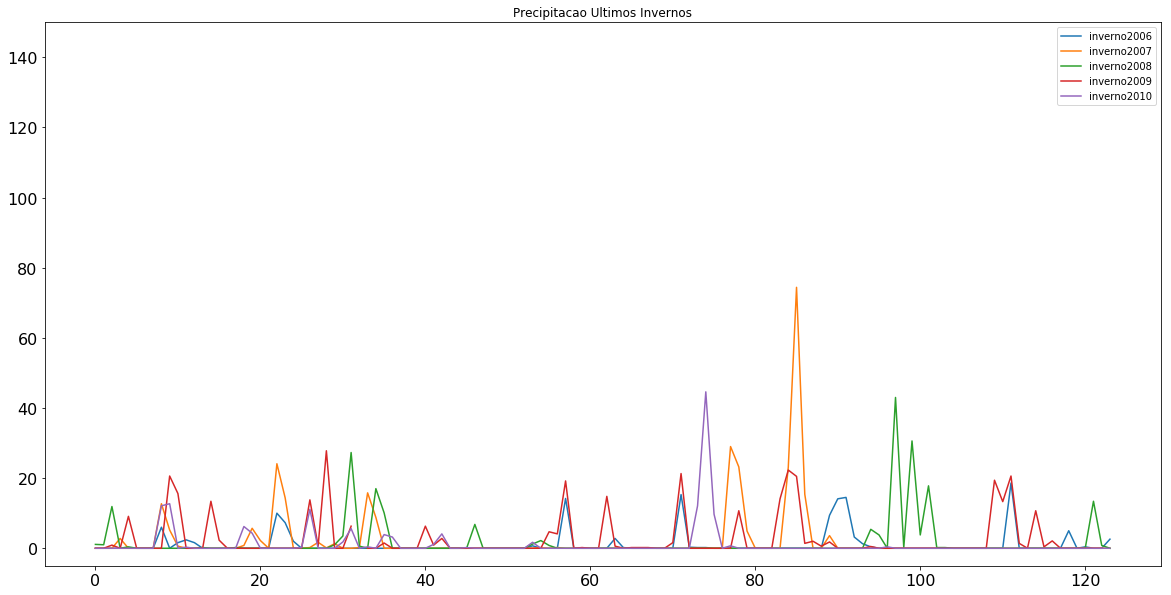

In [63]:
# dfInverno[20:40]
dfInverno.plot(title='Precipitacao Ultimos Invernos', kind='line', figsize=(20,10), ylim=[-5, 150], fontsize=16)

In [65]:
#--Analisando ultimos 11 invernos em detalhe
inverno2011 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2011-05-01'):pd.Timestamp('2011-09-01')]
inverno2011 = inverno2011.reset_index(drop=True)
inverno2012 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2012-05-01'):pd.Timestamp('2012-09-01')]
inverno2012 = inverno2012.reset_index(drop=True)
inverno2013 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2013-05-01'):pd.Timestamp('2013-09-01')]
inverno2013 = inverno2013.reset_index(drop=True)
inverno2014 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2014-05-01'):pd.Timestamp('2014-09-01')]
inverno2014 = inverno2014.reset_index(drop=True)
inverno2015 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2015-05-01'):pd.Timestamp('2015-09-01')]
inverno2015 = inverno2015.reset_index(drop=True)
inverno2016 = dfEstCamposExploracao.Precipitacao[pd.Timestamp('2016-05-01'):pd.Timestamp('2016-09-01')]
inverno2016 = inverno2016.reset_index(drop=True)

dfInverno = pd.DataFrame({'inverno2006' : inverno2006, 'inverno2007' : inverno2007, 'inverno2008' : inverno2008, 'inverno2009' : inverno2009, 'inverno2010' : inverno2010, 'inverno2011' : inverno2011, 'inverno2012' : inverno2012, 'inverno2013' : inverno2013, 'inverno2014' : inverno2014, 'inverno2015' : inverno2015, 'inverno2016' : inverno2016})

dfInverno.replace(-100, np.nan, inplace=True)

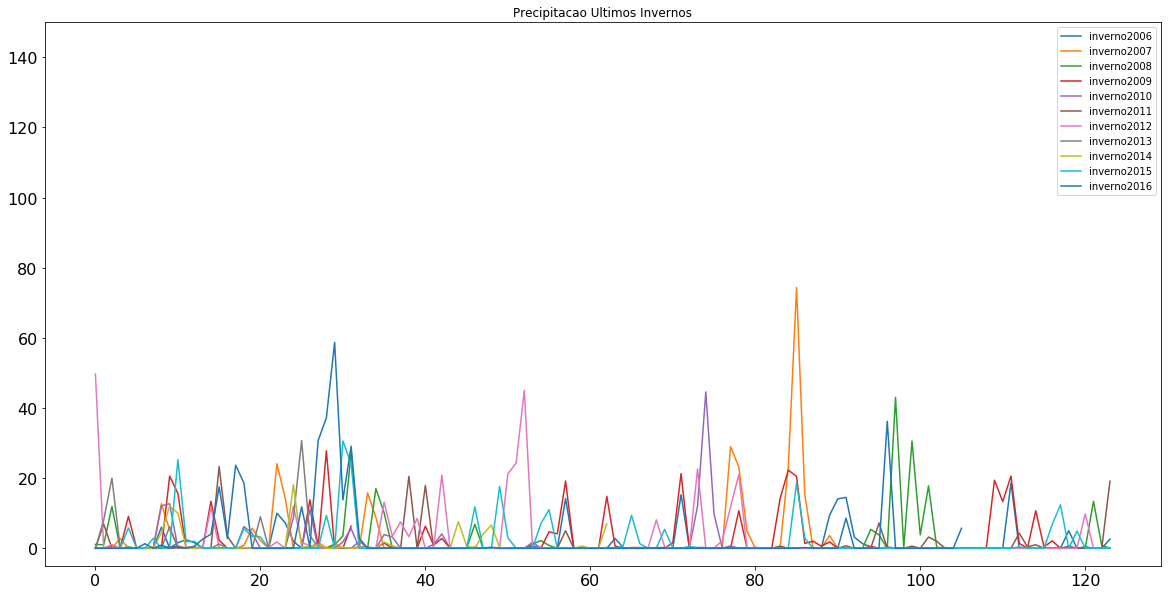

In [67]:
# dfInverno[20:40]
dfInverno.plot(title='Precipitacao Ultimos Invernos', kind='line', figsize=(20,10), ylim=[-5, 150], fontsize=16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1270319e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1275638d0>]], dtype=object)

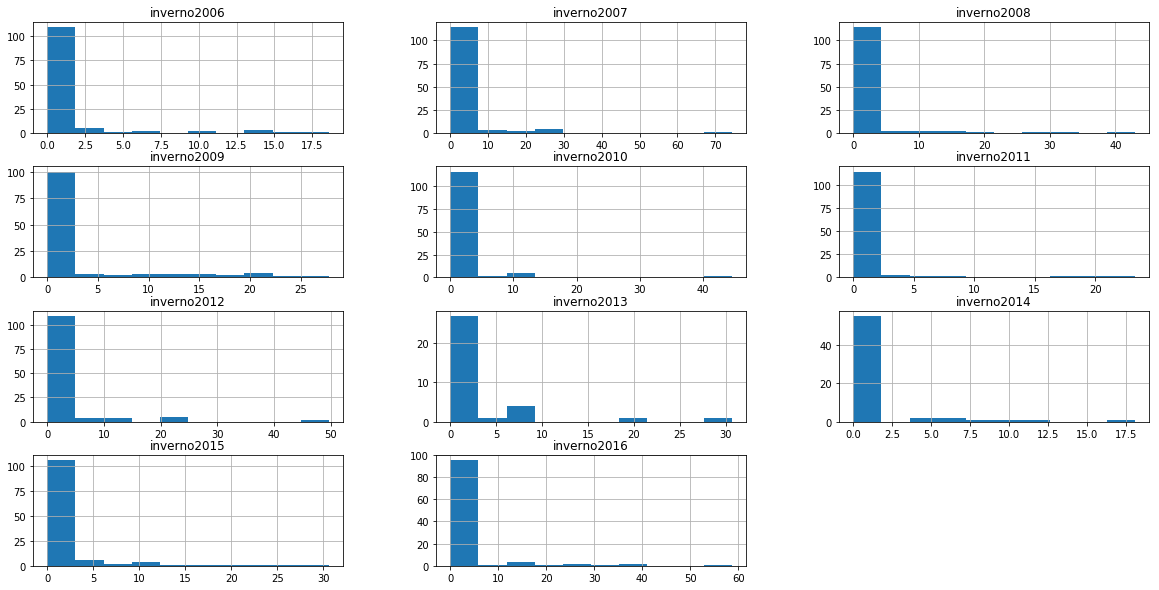

In [68]:
#Observando distribuicao da precipitacao por dia
dfInverno.hist(layout=(4,3), figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1275ea710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127cff4e0>]], dtype=object)

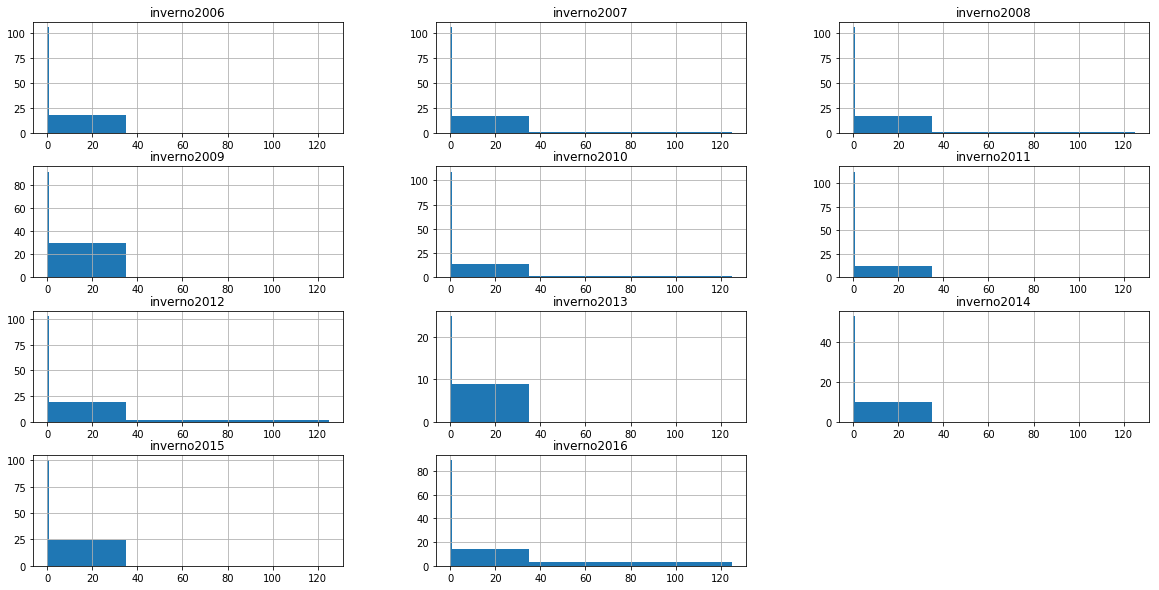

In [69]:
#--Obsevando distribuicao evidenciando dias sem chuva
# dfInverno.hist(layout=(4,3), figsize=(20,10), bins=[0, 1, 5, 35, 65, 95, 125])
dfInverno.hist(layout=(4,3), figsize=(20,10), bins=[0, 1, 35, 125])

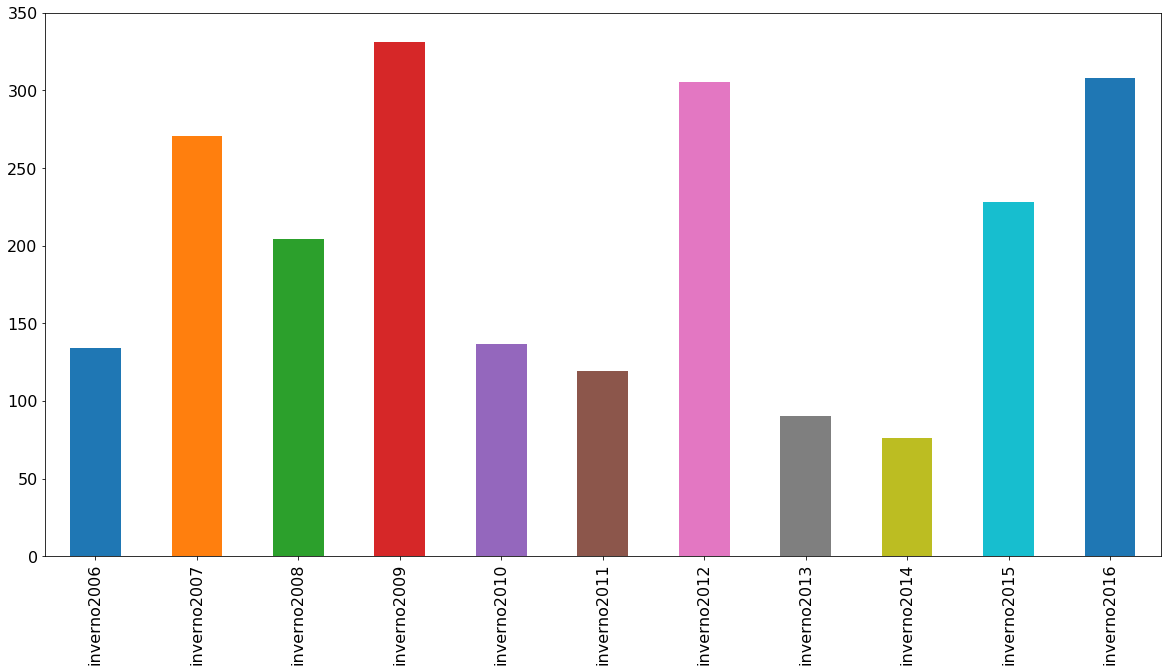

In [70]:
#--Resumindo volume precipitado no inverno
dfInverno.sum().plot(kind='bar', figsize=(20,10), ylim=[0, 350], fontsize=16)

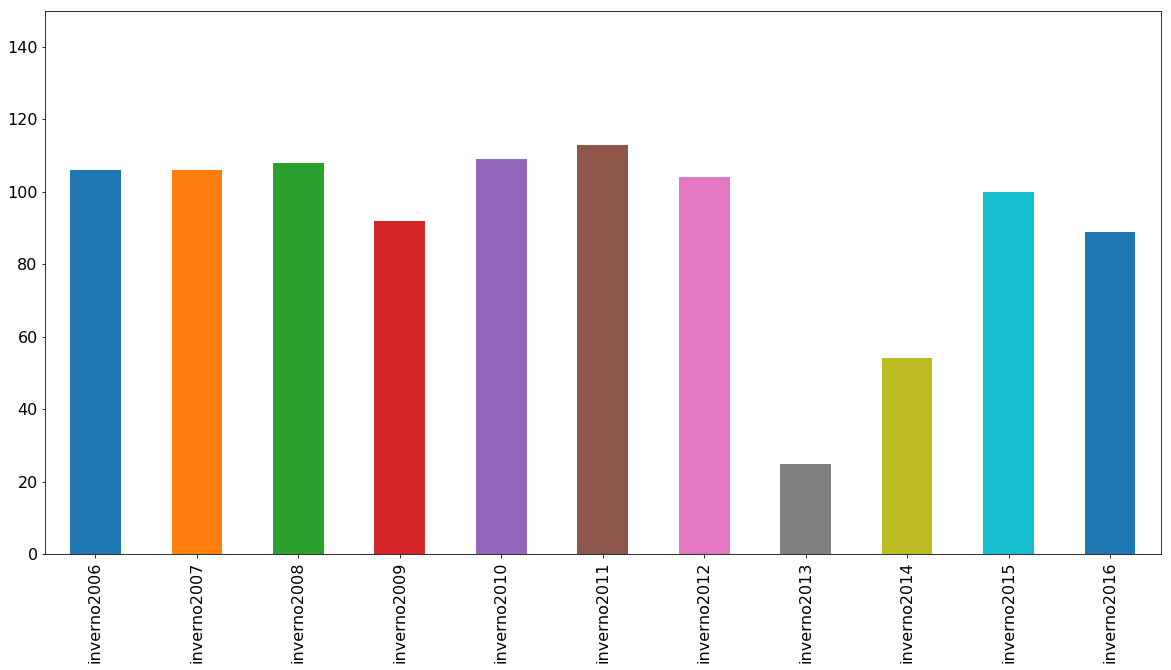

In [71]:
#--Resumindo dias sem chuva
dfInverno[dfInverno<=1].count().plot(ylim=[0, 150], kind='bar', figsize=(20,10), fontsize=16)

In [ ]:
#--Resumindo variacao de dias sem chuva
vetDiasSemChuva = dfInverno[dfInverno<=1].count()
# vetDiasSemChuva.describe()

In [76]:
vetDiasSemChuva.mean()

91.454545454545453

In [75]:
vetDiasSemChuva.std()

27.431236342402197

### Resultados

In [77]:
#--Relativando variacao de dias sem chuva
#Porcentagem media de dias sem chuva no inverno, segundo ultimos 10 anos
vetDiasSemChuva.mean()/dfInverno.inverno2006.count()


0.73753665689149561

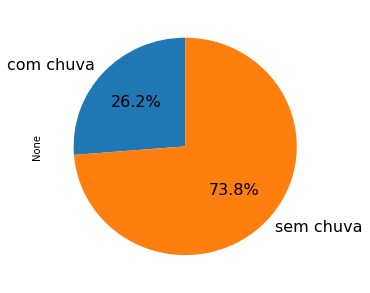

In [78]:
#Plot
pd.Series([1-vetDiasSemChuva.mean()/dfInverno.inverno2006.count(),vetDiasSemChuva.mean()/dfInverno.inverno2006.count()]).plot(kind='pie', labels=['com chuva','sem chuva'], startangle=90, shadow=False, figsize=(5,5), fontsize=16, autopct='%1.1f%%')

In [79]:
#Coeficiente de variacao
vetDiasSemChuva.std()/vetDiasSemChuva.mean()

0.29994393614952702

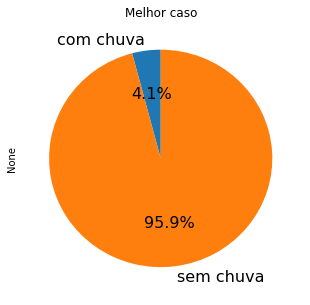

In [80]:
#Plot melhor caso
pd.Series([1-(vetDiasSemChuva.mean()+vetDiasSemChuva.std())/dfInverno.inverno2006.count(),(vetDiasSemChuva.mean()+vetDiasSemChuva.std())/dfInverno.inverno2006.count()]).plot(kind='pie', labels=['com chuva','sem chuva'], startangle=90, shadow=False, title='Melhor caso', figsize=(5,5), fontsize=16, autopct='%1.1f%%')


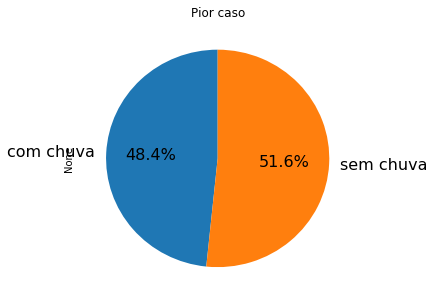

In [81]:
#Plot pior caso
pd.Series([1-(vetDiasSemChuva.mean()-vetDiasSemChuva.std())/dfInverno.inverno2006.count(),(vetDiasSemChuva.mean()-vetDiasSemChuva.std())/dfInverno.inverno2006.count()]).plot(kind='pie', labels=['com chuva','sem chuva'], startangle=90, shadow=False, fontsize=16, title='Pior caso', figsize=(5,5), autopct='%1.1f%%')


## Fim! \o/

---
## Outro dataset
### Possibilidade para próxima aula
> Google - Google Analytics demo account, ecommerce of Google souvenirs

> GA Demo Account: https://support.google.com/analytics/answer/6367342?hl=en

> eCommerce: https://shop.googlemerchandisestore.com/?utm_source=Partners&utm_medium=affiliate&utm_campaign=Data%20Share%20Promo
